#  SPY Hedged vs Outperforming UST 

[*********************100%***********************]  5 of 5 completed


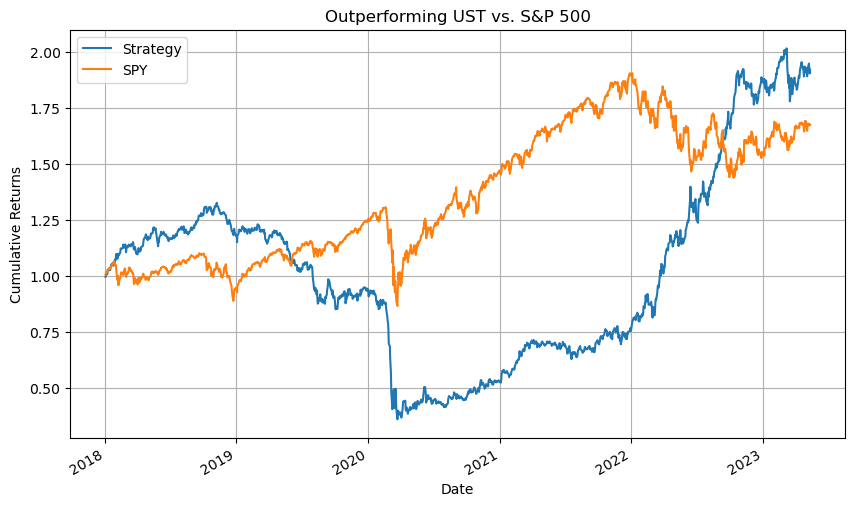

In [2]:
import yfinance as yf
import pandas as pd
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt

# Define the tickers for each asset class
tickers = ["SPY", "^IRX", "^FVX", "^TNX", "^TYX"]

# Set the start date to January 1, 2010
start_date = "2018-01-01"

# Set the end date to today's date
end_date = date.today()

# Download historical price data for each ticker
prices = yf.download(tickers, start=start_date, end=end_date, interval="1d")["Adj Close"]

# Calculate the percent change of each asset class
returns = prices.pct_change().iloc[-1]

# Identify the outperforming asset class
outperformer = returns.idxmax()

# Calculate the cumulative return for each ticker
cum_returns = (1 + prices.pct_change()).cumprod()

# Add a column to the cumulative returns dataframe that calculates the overall portfolio return
cum_returns["Strategy"] = cum_returns.mean(axis=1)

# Calculate the cumulative return for the S&P
cum_spy_returns = (1 + prices["SPY"].pct_change()).cumprod()

# Combine the strategy and S&P cumulative returns into a single dataframe
combined_returns = pd.concat([cum_returns["Strategy"], cum_spy_returns], axis=1)
combined_returns.columns = ["Strategy", "SPY"]

# Plot the cumulative returns of the strategy and S&P 500
fig, ax = plt.subplots(figsize=(10, 6))
combined_returns.plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Cumulative Returns")
ax.set_title("Outperforming UST vs. S&P 500")
ax.grid(True)
plt.show()
